In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

# With random field

In [4]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_spin_glass_fh.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_spin_glass_fh.pkl")

In [5]:
betas = res_ex["betas"]

In [6]:
res_nn = solvers.nn_sol(model_, betas, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=1000,)
res_nn["name"]="nn"

fe: -7.469 std_fe: 4.13E-02 M: 0.241 S: 0.643 E: -1.043: 0.245, B1 = 0.206
fe: -4.464 std_fe: 5.99E-02 M: 0.460 S: 0.527 E: -1.828: 0.46, B1 = 0.6100
fe: -3.677 std_fe: 6.14E-02 M: 0.623 S: 0.402 E: -2.339: 0.62, B1 = 1.0677
fe: -3.383 std_fe: 5.24E-02 M: 0.736 S: 0.294 E: -2.648: 0.734, B1 = 1.502
fe: -3.254 std_fe: 4.23E-02 M: 0.817 S: 0.218 E: -2.817: 0.813, B1 = 1.906
fe: -3.191 std_fe: 2.88E-02 M: 0.872 S: 0.164 E: -2.918: 0.874, B1 = 2.291
fe: -3.157 std_fe: 2.01E-02 M: 0.914 S: 0.119 E: -2.986: 0.909, B1 = 2.663
fe: -3.138 std_fe: 1.23E-02 M: 0.938 S: 0.091 E: -3.025: 0.932, B1 = 3.059
fe: -3.128 std_fe: 9.44E-03 M: 0.956 S: 0.069 E: -3.051: 0.963, B1 = 3.484
fe: -3.121 std_fe: 5.55E-03 M: 0.967 S: 0.053 E: -3.068: 0.968, B1 = 3.846
fe: -3.116 std_fe: 4.14E-03 M: 0.977 S: 0.041 E: -3.079: 0.979, B1 = 4.244
fe: -3.114 std_fe: 2.54E-03 M: 0.983 S: 0.031 E: -3.088: 0.984, B1 = 4.613
fe: -3.112 std_fe: 2.34E-04 M: 0.987 S: 0.025 E: -3.093 0.988, B1 = 4.973
fe: -3.111 std_fe: 9.44E-0

In [16]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=2000,
                           lr=0.005,
                           bias = True, z2 = False, x_hat_clip = False,
                           stats=20000,
                           batch_size=5000,
                           i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.471 std_fe: 2.46E-05 M: 2.155 S: 0.643 E: -1.046: 0.239, B1 = 0.207
fe: -4.470 std_fe: 4.29E-05 M: 4.156 S: 0.525 E: -1.846: 0.46, B1 = 0.6122
fe: -3.686 std_fe: 5.53E-05 M: 5.322 S: 0.401 E: -2.350: 0.623, B1 = 1.078
fe: -3.393 std_fe: 6.66E-05 M: 5.993 S: 0.299 E: -2.645: 0.729, B1 = 1.509
fe: -3.261 std_fe: 8.06E-05 M: 6.305 S: 0.224 E: -2.813: 0.82, B1 = 1.9000
fe: -3.196 std_fe: 1.04E-04 M: 6.445 S: 0.168 E: -2.915: 0.878, B1 = 2.289
fe: -3.161 std_fe: 1.31E-04 M: 6.490 S: 0.128 E: -2.978: 0.914, B1 = 2.681
fe: -3.141 std_fe: 1.70E-04 M: 6.416 S: 0.099 E: -3.018: 0.94, B1 = 3.0587
fe: -3.128 std_fe: 1.63E-04 M: 6.343 S: 0.073 E: -3.047: 0.957, B1 = 3.447
fe: -3.123 std_fe: 3.89E-04 M: 6.369 S: 0.064 E: -3.059: 0.967, B1 = 3.828
fe: -3.116 std_fe: 3.89E-06 M: 6.204 S: 0.041 E: -3.079: 0.977, B1 = 4.218
fe: -3.114 std_fe: 1.86E-06 M: 6.163 S: 0.032 E: -3.087: 0.983, B1 = 4.595
fe: -3.116 std_fe: 2.00E-03 M: 6.317 S: 0.079 E: -3.056: 0.986, B1 = 4.993
fe: -3.111 std_fe: 4.24E-

In [10]:
import imp
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas)
res_bp["name"]="bp"

fe: -7.470, ener: -1.043, M: 0.240, iter 8
fe: -4.469, ener: -1.844, M: 0.458, iter 9
fe: -3.687, ener: -2.356, M: 0.616, iter 10
fe: -3.394, ener: -2.646, M: 0.715, iter 10
fe: -3.262, ener: -2.813, M: 0.794, iter 10
fe: -3.196, ener: -2.913, M: 0.852, iter 10
fe: -3.161, ener: -2.977, M: 0.894, iter 9
fe: -3.141, ener: -3.019, M: 0.925, iter 9
fe: -3.129, ener: -3.046, M: 0.946, iter 9
fe: -3.122, ener: -3.065, M: 0.962, iter 8
fe: -3.117, ener: -3.077, M: 0.972, iter 8
fe: -3.114, ener: -3.085, M: 0.980, iter 7
fe: -3.112, ener: -3.091, M: 0.985, iter 7
fe: -3.111, ener: -3.095, M: 0.989, iter 7
fe: -3.110, ener: -3.098, M: 0.991, iter 7
fe: -3.109, ener: -3.101, M: 0.994, iter 7
fe: -3.109, ener: -3.102, M: 0.995, iter 7
fe: -3.108, ener: -3.103, M: 0.996, iter 7
fe: -3.108, ener: -3.104, M: 0.997, iter 6
fe: -3.108, ener: -3.105, M: 0.998, iter 6


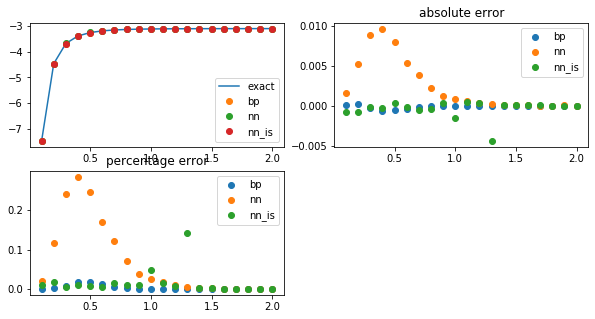

In [17]:
%matplotlib inline
label="fe"
import imp
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

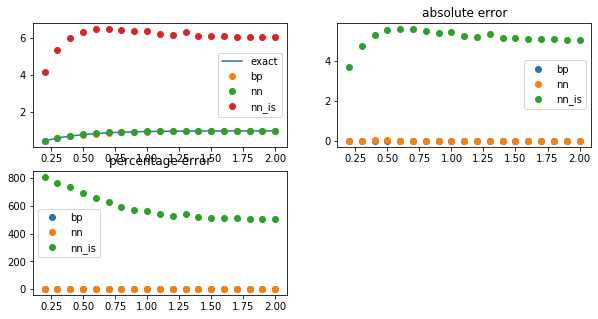

In [18]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

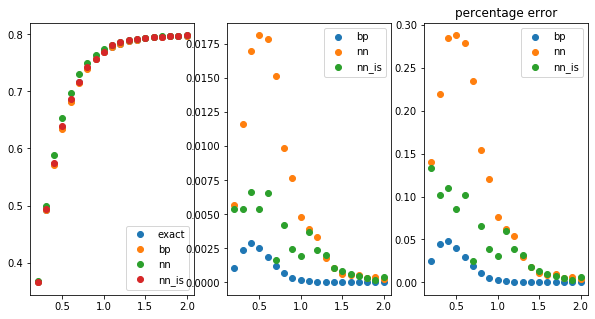

In [13]:
%matplotlib inline
label="M_i"
import imp
imp.reload(solvers)

plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=1)
plt.show()

In [ ]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas, res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

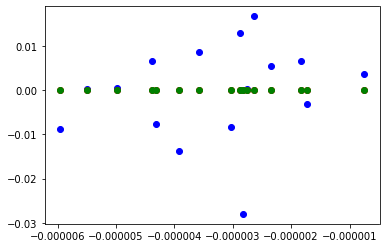

In [195]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][0], res_nn["M_i"][0], "bo")
plt.plot(res_ex["M_i"][0], res_bp["M_i"][0], "ro")
plt.plot(res_ex["M_i"][0], np.tanh(1e-6*H), "go")
